### Read Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = 'D:\BIM\Summer Project\project\datasets\ibm-dataset.csv'
appended_path = r'D:\BIM\Summer Project\project\datasets\appended-data.csv'
# Read dataset
df = pd.read_csv(appended_path)

pd.options.display.max_columns = None

df.shape
df

display(df.head(3))
# print(df['MonthlyIncome'].max())
# print(df['MonthlyIncome'].min())

<>:5: SyntaxWarning: invalid escape sequence '\B'
<>:5: SyntaxWarning: invalid escape sequence '\B'
C:\Users\sworn\AppData\Local\Temp\ipykernel_19936\2021592697.py:5: SyntaxWarning: invalid escape sequence '\B'
  path = 'D:\BIM\Summer Project\project\datasets\ibm-dataset.csv'


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1.0,6.0,4.0,0.0,5.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3.0,10.0,7.0,1.0,7.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3.0,0.0,0.0,0.0,0.0


### Clean Dataset

In [ ]:
# Check missing values
# print(df.columns[df.isnull().sum() > 1])


# Drop missing values (apparently none)
df = df.dropna()

# Check missing values after dropping
print(df.columns[df.isnull().sum() > 1])

# Remove duplicates
df = df.drop_duplicates()

# Drop irrelevant columns:
# YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, TrainingTimesLastYear, StockOptionLevel, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, 'EmployeeCount', 'Over18', 'StandardHours', Education

df = df.drop(columns=['EmployeeNumber','EmployeeCount', 'Over18', 'StandardHours', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                     'YearsWithCurrManager', 'TrainingTimesLastYear', 'StockOptionLevel', 'PercentSalaryHike', 'PerformanceRating',
                     'RelationshipSatisfaction', 'NumCompaniesWorked', 'BusinessTravel', 'DailyRate', 'HourlyRate', 'MonthlyRate', 'Education'])

# Drop index column
df = df.reset_index(drop=True)

print(df.shape)
print(df.columns)

Index([], dtype='object')
      Age Attrition              Department  DistanceFromHome  \
0      41       Yes                   Sales                 1   
1      49        No  Research & Development                 8   
2      37       Yes  Research & Development                 2   
3      33        No  Research & Development                 3   
4      27        No  Research & Development                 2   
...   ...       ...                     ...               ...   
4674   34        No  Research & Development                 0   
4675   53       Yes                   Sales                 0   
4676   42        No  Research & Development                16   
4677   31       Yes                   Sales                17   
4678   42       Yes                   Sales                13   

       EducationField  EnvironmentSatisfaction  Gender  JobInvolvement  \
0       Life Sciences                        2  Female               3   
1       Life Sciences                        

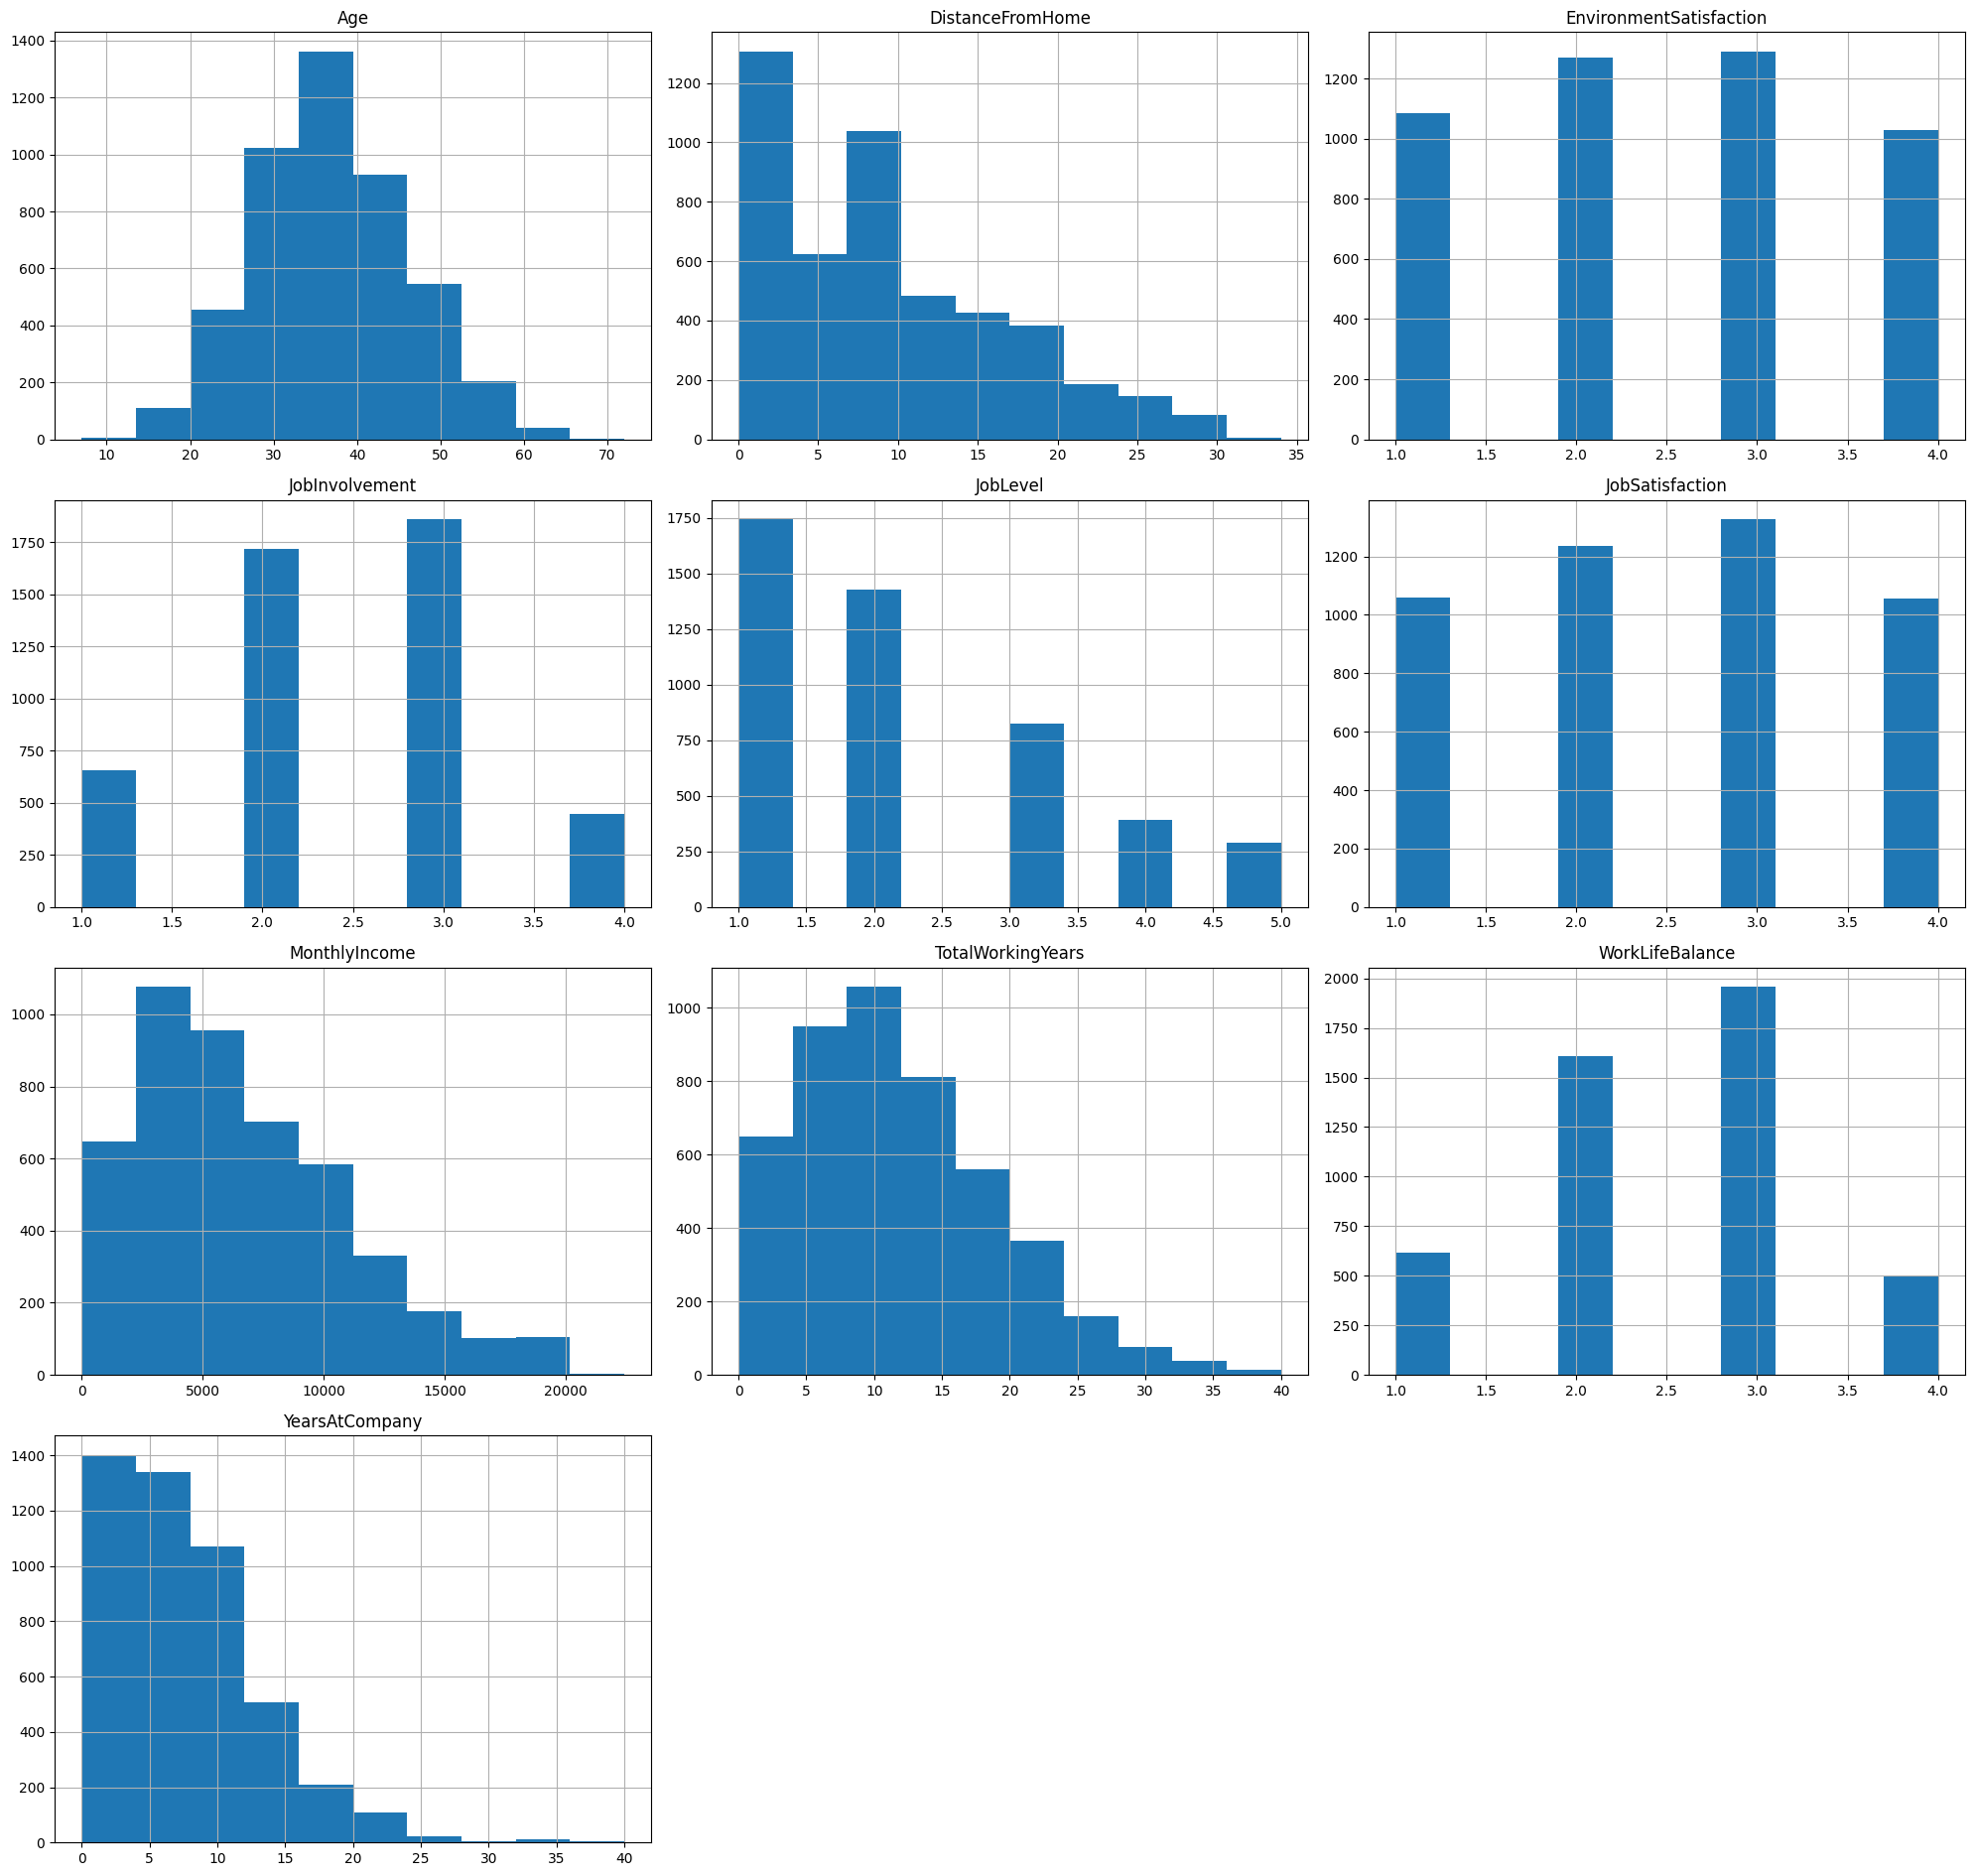

In [35]:
# Plot histograms to find irrelevant columns
df.hist(figsize=(20, 19))
plt.tight_layout()
plt.show()

### Extract 20 Rows for Analysis

In [36]:
# Extract 20 rows and save to CSV (remove employee number for prediction)
df_20 = df.sample(20, random_state=42)
# df_20 = df_20.drop(columns=['Attrition', 'EmployeeNumber'])
df_20.to_csv('extracted-20.csv', index=False)

#Remove df_20 from the original dataframe
df = df.drop(df_20.index)

# Save the cleaned dataset to a new CSV file
df.to_csv('ibm-dataset-cleaned.csv', index=False)

# Check the cleaned dataset
df_cleaned = pd.read_csv('ibm-dataset-cleaned.csv')

### Convert to Binary or One Hot Encoding

In [ ]:
# Convert to Binary: Attrition, Gender, Over18, OverTime
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

# Convert to One Hot Encoding: BusinessTravel, Department, EducationField, JobRole, MaritalStatus
df = df.join(pd.get_dummies(df['Department'], prefix='Dept')).drop('Department', axis=1)
df = df.join(pd.get_dummies(df['EducationField'], prefix='EduField')).drop('EducationField', axis=1)
df = df.join(pd.get_dummies(df['JobRole'], prefix='JobRole')).drop('JobRole', axis=1)
df = df.join(pd.get_dummies(df['MaritalStatus'])).drop('MaritalStatus', axis=1)

#Convert One Hot Encoding to Binary
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)
df

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,Dept_Human Resources,Dept_Research & Development,Dept_Sales,EduField_Human Resources,EduField_Life Sciences,EduField_Marketing,EduField_Medical,EduField_Other,EduField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Divorced,Married,Single
0,41,1,1,2,0,3,2,4,5993,1,8,1.0,6.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,8,3,1,2,2,2,5130,0,10,3.0,10.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,2,4,1,2,1,3,2090,1,7,3.0,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,3,4,0,3,1,3,2909,1,8,3.0,8.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,2,1,1,3,1,2,3468,0,6,3.0,2.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4674,34,0,0,2,0,1,3,1,7630,0,18,4.0,4.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
4675,53,1,0,1,0,3,2,3,49,1,16,1.0,11.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4676,42,0,16,1,1,3,1,1,14011,1,32,3.0,13.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4677,31,1,17,2,0,4,1,2,6445,0,5,3.0,10.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [38]:
# Convert to integer: Age, DistanceFromHome, EmployeeNumber, HourlyRate, MonthlyIncome, MonthlyRate, NumCompaniesWorked, TotalWorkingYears, TrainingTimesLastYear

int_columns = ['Age', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
               'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear']

### Visualizing and Removing Unnecessary Columns

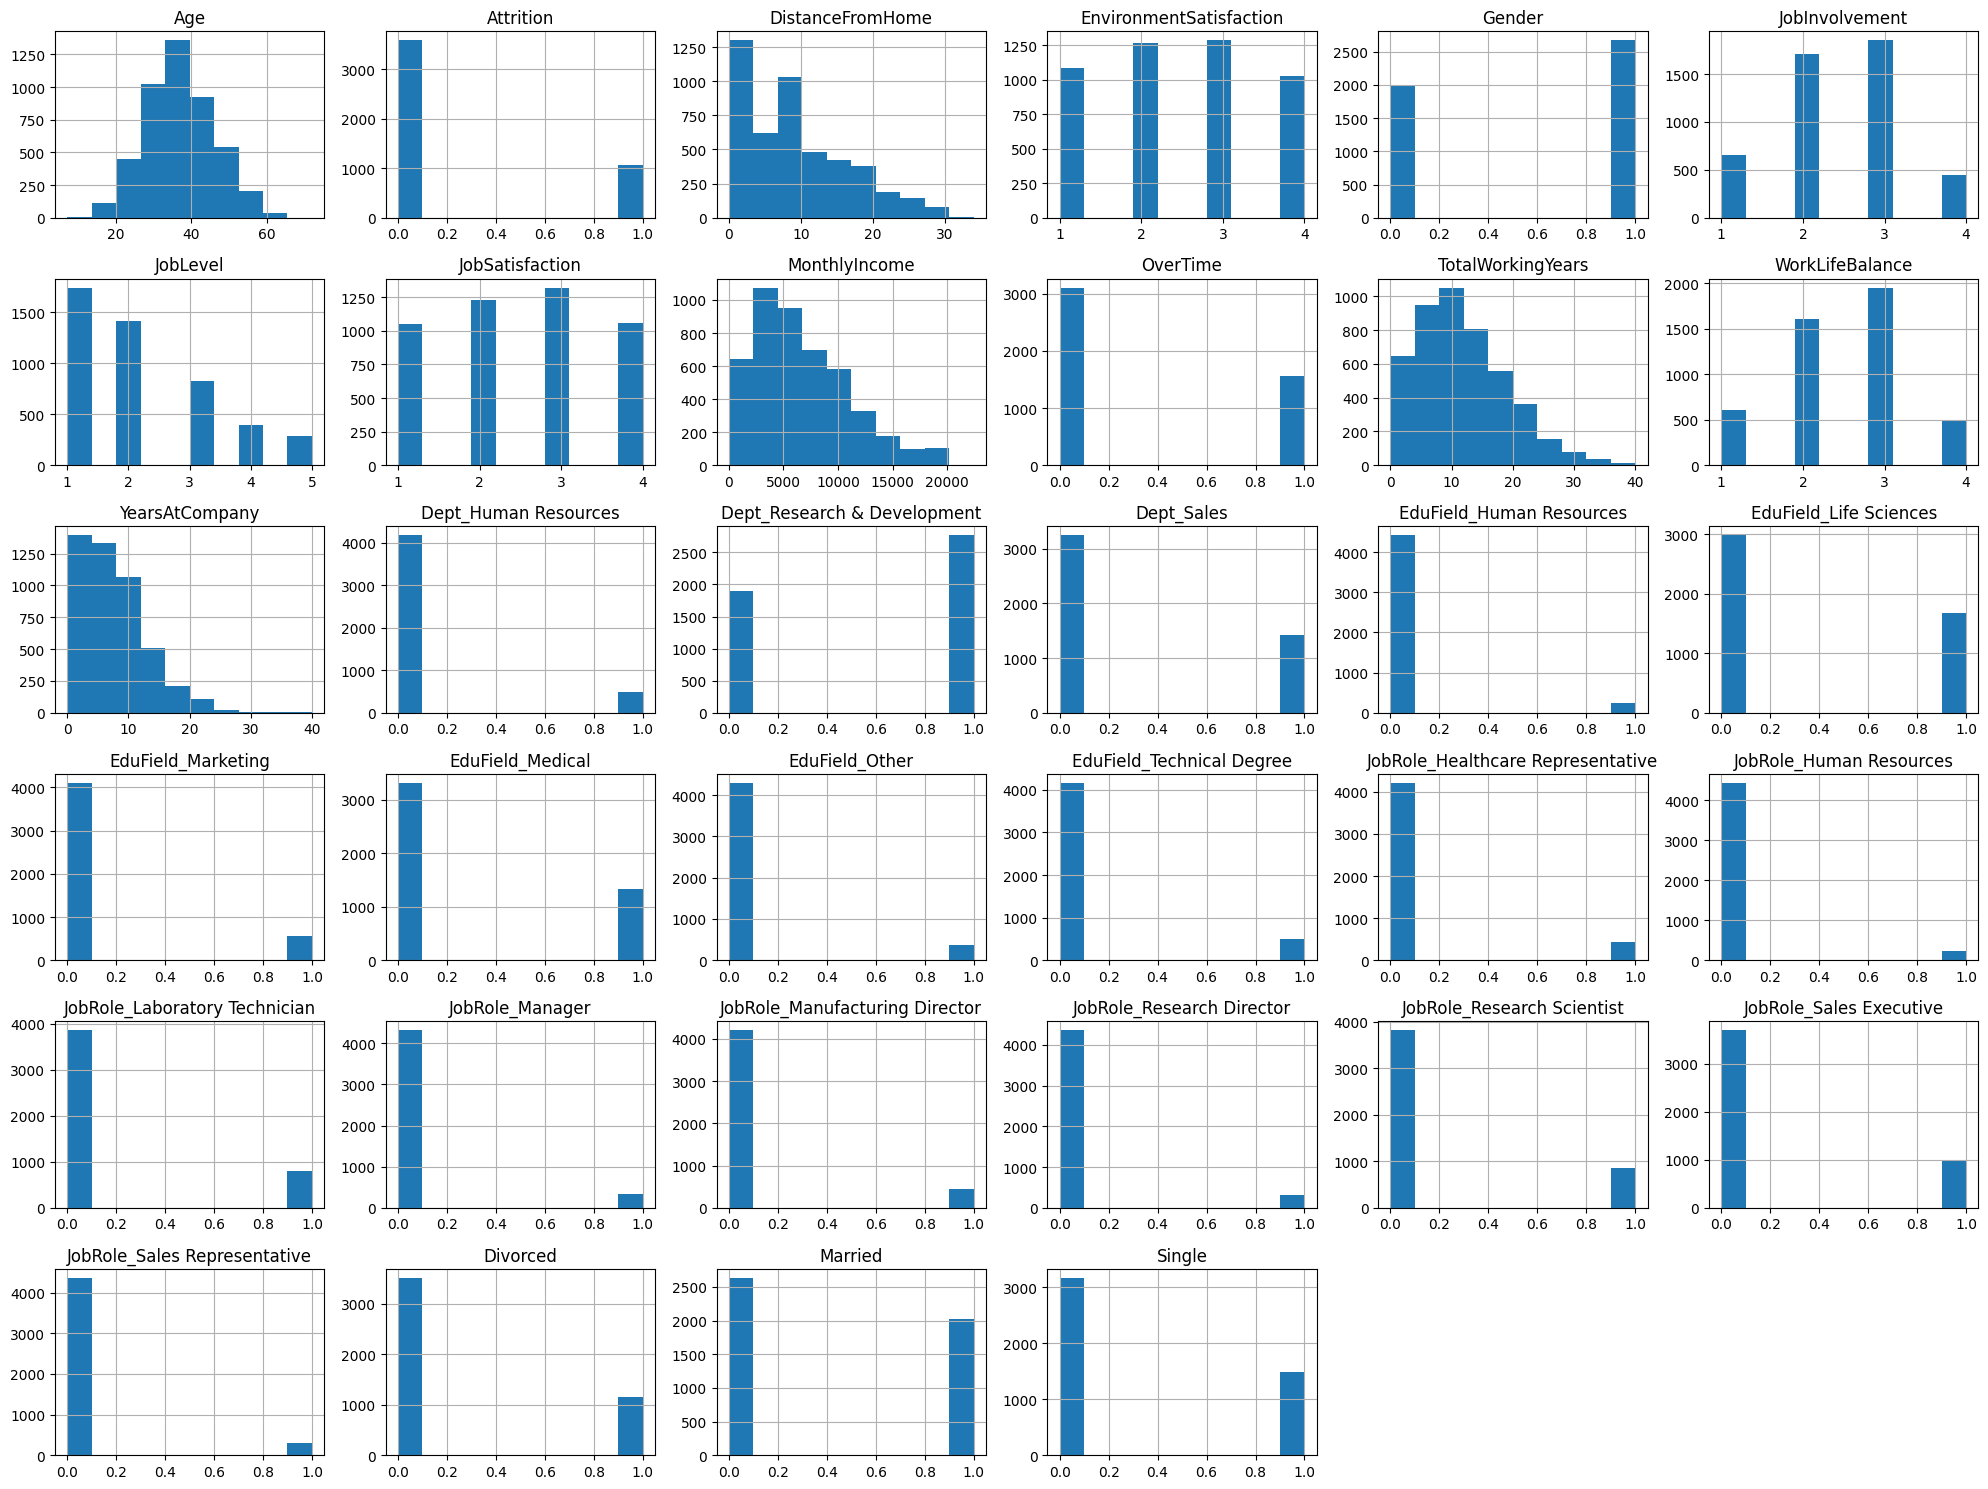

In [39]:
# Plot histograms to find irrelevant columns
df.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

In [40]:
# df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)
# df

### Save

In [41]:
# Save cleaned data as CSV
df.to_csv('D:\BIM\Summer Project\project\datasets\cleaned_ibm_dataset.csv', index=False)

# Save cleaned data as PKL
df.to_pickle('D:\BIM\Summer Project\project\datasets\cleaned_ibm_dataset.pkl')

<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:5: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:5: SyntaxWarning: invalid escape sequence '\B'
C:\Users\sworn\AppData\Local\Temp\ipykernel_9620\4048453179.py:2: SyntaxWarning: invalid escape sequence '\B'
  df.to_csv('D:\BIM\Summer Project\project\datasets\cleaned_ibm_dataset.csv', index=False)
C:\Users\sworn\AppData\Local\Temp\ipykernel_9620\4048453179.py:5: SyntaxWarning: invalid escape sequence '\B'
  df.to_pickle('D:\BIM\Summer Project\project\datasets\cleaned_ibm_dataset.pkl')


In [42]:
df.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'OverTime', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsAtCompany', 'Dept_Human Resources', 'Dept_Research & Development',
       'Dept_Sales', 'EduField_Human Resources', 'EduField_Life Sciences',
       'EduField_Marketing', 'EduField_Medical', 'EduField_Other',
       'EduField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative', 'Divorced',
       'Married', 'Single'],
      dtype='object')